In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


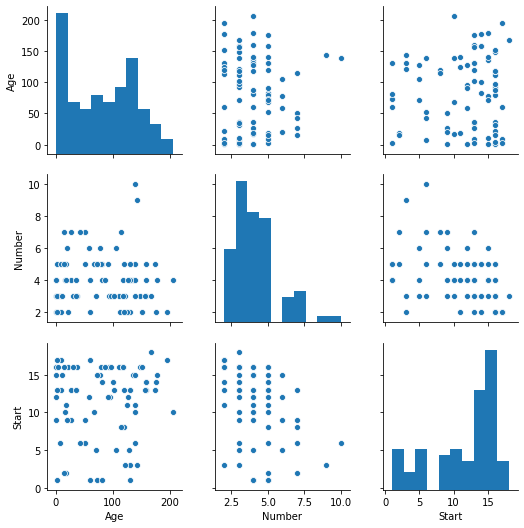

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop("Kyphosis", axis=1)

y = df["Kyphosis"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(380.4545454545455, 509.625, 'X[1] <= 4.5\ngini = 0.27\nsamples = 56\nvalue = [47, 9]'),
 Text(152.1818181818182, 441.675, 'X[0] <= 128.5\ngini = 0.142\nsamples = 39\nvalue = [36, 3]'),
 Text(76.0909090909091, 373.725, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(228.27272727272728, 373.725, 'X[2] <= 13.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(152.1818181818182, 305.775, 'X[1] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(76.0909090909091, 237.825, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(228.27272727272728, 237.825, 'X[0] <= 181.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(152.1818181818182, 169.875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(304.3636363636364, 169.875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(304.3636363636364, 305.775, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(608.7272727272727, 441.675, 'X[0] <= 125.5\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(532.6363636363636, 373.725, 'X[0

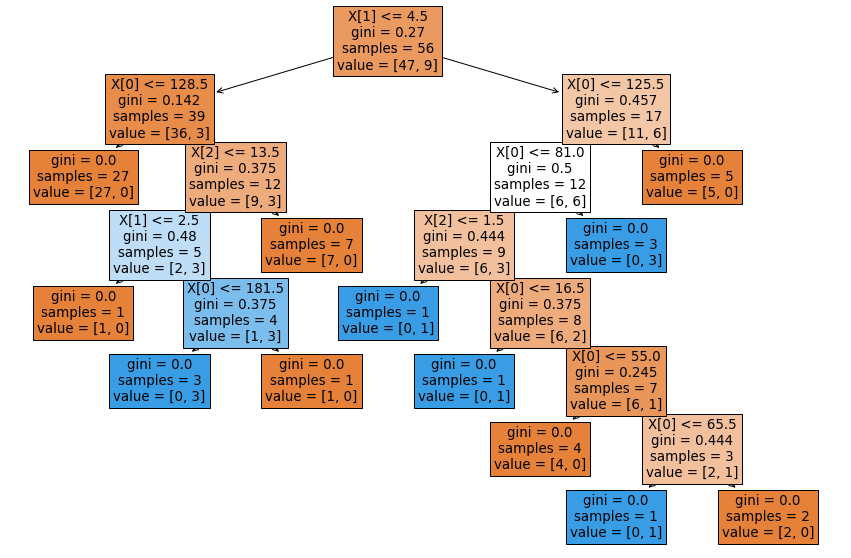

In [12]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



[[13  4]
 [ 6  2]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators=200)

In [18]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(classification_report(y_test,rfc_pred))
print("\n")
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



[[16  1]
 [ 6  2]]
